In [1]:
import tensorflow as tf
import numpy as np
import matplotlib as plt
import os
os.environ["KERAS_BACKEND"] = "tensorflow"
import keras

# Load dataset

In [2]:
training_set = tf.keras.utils.image_dataset_from_directory(
    "train",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 69008 files belonging to 38 classes.


In [4]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    "valid",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 17255 files belonging to 38 classes.


In [3]:
from tensorflow.keras.layers import Dense,Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.models import Sequential

In [6]:
model = Sequential()

In [7]:
model.add(Conv2D(filters = 32, kernel_size=3, padding='same', activation='relu',input_shape=[128,128,3] ))
model.add(Conv2D(filters = 32, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2,  strides=2))

C:\Users\vivek\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.add(Conv2D(filters = 64, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters = 64, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2,  strides=2))

In [9]:
model.add(Conv2D(filters = 128, kernel_size=3, padding='same', activation='relu' ))
model.add(Conv2D(filters = 128, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2,  strides=2))

In [10]:
model.add(Conv2D(filters = 256, kernel_size=3, padding='same', activation='relu' ))
model.add(Conv2D(filters = 256, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2,  strides=2))

In [11]:
model.add(Conv2D(filters = 512, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters = 512, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2,  strides=2))

In [12]:
model.add(Dropout(0.25))

In [13]:
model.add(Flatten())

In [14]:
model.add(Dense(activation='relu', units=1500))

In [15]:
model.add(Dropout(0.4))

In [16]:
#Output layer

model.add(Dense(activation='softmax', units=38))

model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#Training Model

In [5]:
training_model = tf.keras.models.load_model('NPDDCustom_model.keras')

In [31]:
test_set = tf.keras.utils.image_dataset_from_directory(
    "valid",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 17255 files belonging to 38 classes.


In [12]:
predicted_categories = tf.argmax(y_pred, axis=1)
predicted_categories

<tf.Tensor: shape=(17255,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [ ]:
y_pred = training_model.predict(test_set)
y_pred

In [14]:
true_categories = tf.argmax(tf.concat([y for x,y in test_set], axis=0), axis=1)
true_categories

<tf.Tensor: shape=(17255,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [40]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [33]:
class_name = test_set.class_names

In [34]:
print(classification_report(true_categories, predicted_categories, target_names=class_name ))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.98      0.93      0.96       504
                                 Apple___Black_rot       0.99      0.95      0.97       497
                          Apple___Cedar_apple_rust       0.91      1.00      0.95       440
                                   Apple___healthy       0.94      0.91      0.93       502
                               Blueberry___healthy       0.95      0.98      0.97       454
          Cherry_(including_sour)___Powdery_mildew       0.99      0.98      0.99       421
                 Cherry_(including_sour)___healthy       0.94      1.00      0.97       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.93      0.81      0.86       191
                       Corn_(maize)___Common_rust_       1.00      1.00      1.00       477
               Corn_(maize)___Northern_Leaf_Blight       0.92      0.98      0.

In [39]:
cm = confusion_matrix(true_categories, predicted_categories)
cm, cm.shape

(array([[469,   2,   1, ...,   0,   0,   1],
        [  0, 474,   3, ...,   0,   0,   0],
        [  0,   0, 440, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ..., 490,   0,   0],
        [  0,   0,   0, ...,   0, 428,   0],
        [  0,   0,   2, ...,   0,   0, 460]]),
 (38, 38))

<Axes: >

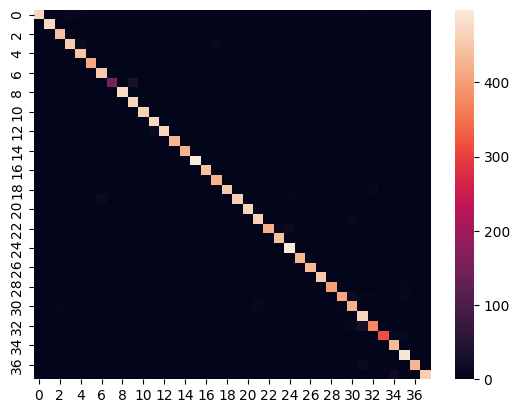

In [41]:
sns.heatmap(cm)